# BatDetect2 - Demo

This notebook gives an example of how to run the BatDetect2 code. You can either run it locally on your own computer or on Google Colab. 

It first specifies some arguments, loads the model, slects the audio file of interest, runs the model, and finally plots the results. 

Click [here](https://colab.research.google.com/github/macaodha/batdetect2/blob/master/batdetect2_notebook.ipynb) to run it on on Google Colab. Make sure to enable GPU usage on Colab for this Notebook to make it run faster. On Colab you will also have to uncomment some lines - see below for details. 

### Load the model

In [1]:
# the following lines are only needed in Colab.
# clone the code and change directory
#!git clone https://github.com/macaodha/batdetect2
#%cd batdetect2

In [2]:
# import the necessary libraries
import os
import glob
import matplotlib.pyplot as plt

import config
import bat_detect.utils.detector_utils as du
import bat_detect.utils.audio_utils as au
import bat_detect.utils.plot_utils as viz

In [3]:
# setup the arguments
args = du.get_default_bd_args()
args['detection_threshold'] = 0.3
args['time_expansion_factor'] = 1
args['model_path'] = os.path.join('models', os.path.basename(config.MODEL_PATH))

In [4]:
# load the model
model, params = du.load_model(args['model_path'])

### Select the audio file and run the model

In [5]:
# choose an audio file
audio_file = 'example_data/audio/20180530_213516-EPTSER-LR_0_0.5.wav'

# the following lines are only needed in Colab
# alternatively you can upload your own file
#from google.colab import files
#uploaded = files.upload()
#audio_file = list(uploaded.keys())[0]

In [6]:
# run the model
results = du.process_file(audio_file, model, params, args)

### Print the results

In [7]:
# print summary info for the individual detections 
print('Results for ' + results['pred_dict']['id'])
print('{} calls detected\n'.format(len(results['pred_dict']['annotation'])))

print('time\tprob\tlfreq\tspecies_name')
for ann in results['pred_dict']['annotation']:
    print('{}\t{}\t{}\t{}'.format(ann['start_time'], ann['class_prob'], ann['low_freq'], ann['class']))

Results for 20180530_213516-EPTSER-LR_0_0.5.wav
20 calls detected

time	prob	lfreq	species_name
0.0085	0.744	27187	Eptesicus serotinus
0.0205	0.453	46093	Pipistrellus pipistrellus
0.0445	0.668	46953	Pipistrellus pipistrellus
0.1025	0.729	44375	Pipistrellus pipistrellus
0.1255	0.591	46953	Pipistrellus pipistrellus
0.1625	0.696	28046	Eptesicus serotinus
0.1975	0.618	46093	Pipistrellus pipistrellus
0.2175	0.507	47812	Pipistrellus pipistrellus
0.2775	0.201	33203	Eptesicus serotinus
0.2855	0.749	45234	Pipistrellus pipistrellus
0.3085	0.239	30625	Eptesicus serotinus
0.3155	0.621	27187	Eptesicus serotinus
0.3455	0.319	27187	Eptesicus serotinus
0.3735	0.691	46093	Pipistrellus pipistrellus
0.4005	0.34	31484	Eptesicus serotinus
0.4115	0.386	27187	Eptesicus serotinus
0.4305	0.393	30625	Eptesicus serotinus
0.4435	0.332	27187	Eptesicus serotinus
0.4575	0.45	46093	Pipistrellus pipistrellus
0.4755	0.719	28046	Eptesicus serotinus


### Visualise the detections

In [8]:
# read the audio file 
sampling_rate, audio = au.load_audio_file(audio_file, args['time_expansion_factor'], params['target_samp_rate'], params['scale_raw_audio'])
duration = audio.shape[0] / sampling_rate
print('File duration: {} seconds'.format(duration))

File duration: 0.5 seconds


In [9]:
# generate spectrogram for visualization
spec, spec_viz = au.generate_spectrogram(audio, sampling_rate, params, True, False)

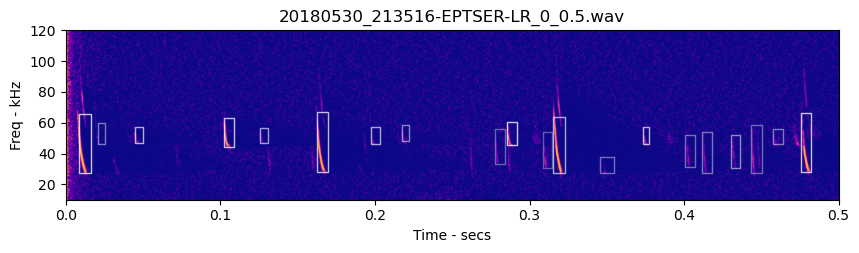

In [10]:
# display the detections on top of the spectrogram
# note, if the audio file is very long, this image will be very large - best to crop the audio first
start_time = 0.0
detections = [ann for ann in results['pred_dict']['annotation']]
fig = plt.figure(1, figsize=(spec.shape[1]/100, spec.shape[0]/100), dpi=100, frameon=False)
spec_duration = au.x_coords_to_time(spec.shape[1], sampling_rate, params['fft_win_length'], params['fft_overlap'])
viz.create_box_image(spec, fig, detections, start_time, start_time+spec_duration, spec_duration, params, spec.max()*1.1, False)
plt.ylabel('Freq - kHz')
plt.xlabel('Time - secs')
plt.title(os.path.basename(audio_file))
plt.show()